Date                 0
Business Line        0
Event Type           0
Event Count          0
Loss Amount          0
Event Description    0
dtype: int64
                                Date   Event Count   Loss Amount
count                          10000  10000.000000  1.000000e+04
mean   2019-12-31 23:59:59.999999744      5.017900  1.443308e+05
min              2015-01-01 00:00:00      0.000000  6.046104e+00
25%              2017-07-02 00:00:00      3.000000  5.623401e+03
50%              2020-01-01 00:00:00      5.000000  2.156952e+04
75%              2022-07-02 00:00:00      6.000000  8.566552e+04
max              2024-12-31 00:00:00     14.000000  3.163245e+07
std                              NaN      2.245414  6.269918e+05


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_77616\1973195495.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=expanded_data, x='Business Line', palette="Set2")


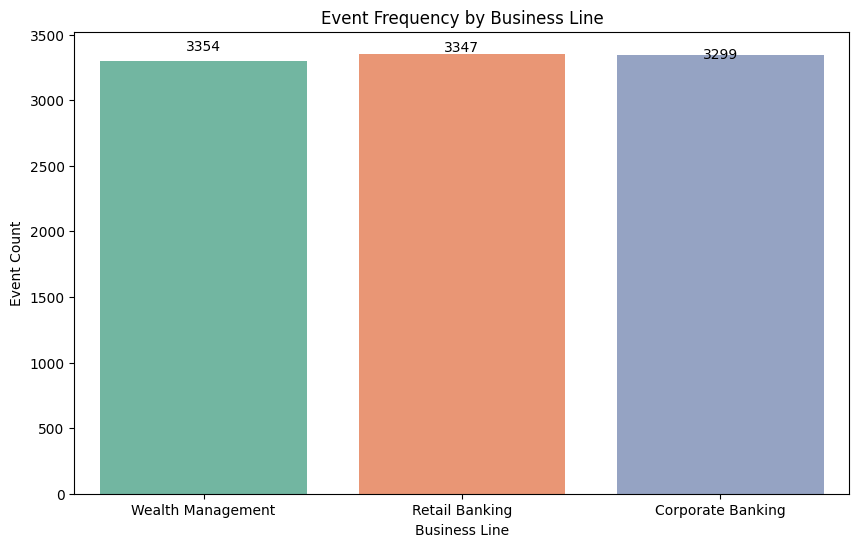

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_77616\1973195495.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=expanded_data, x='Event Type', palette="Set1")


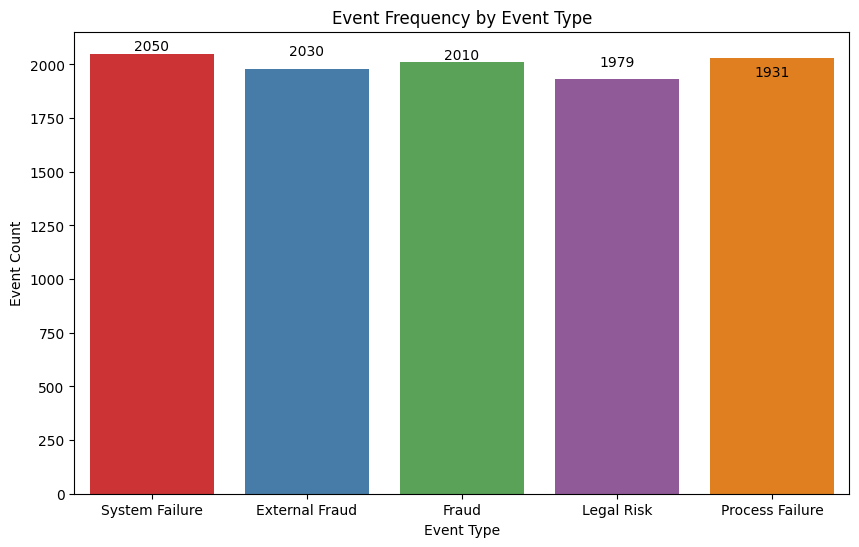

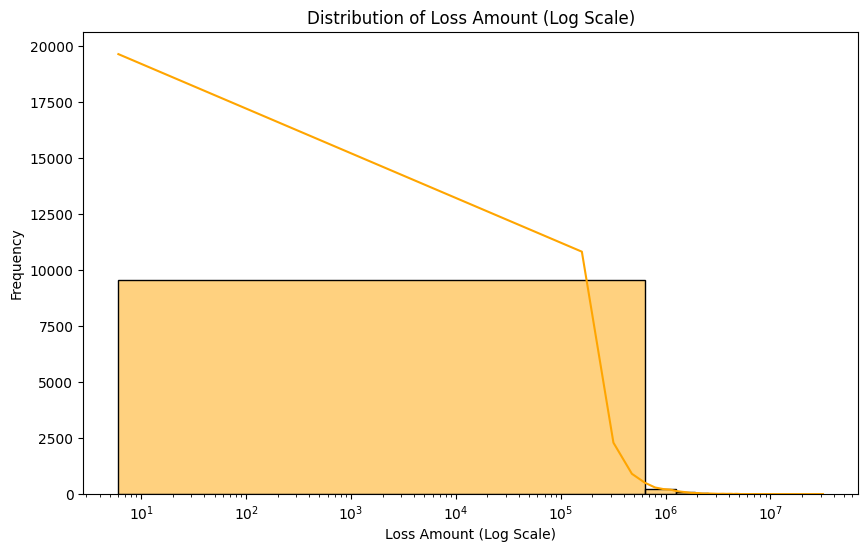

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_77616\1973195495.py:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = expanded_data.resample('M', on='Date').agg({


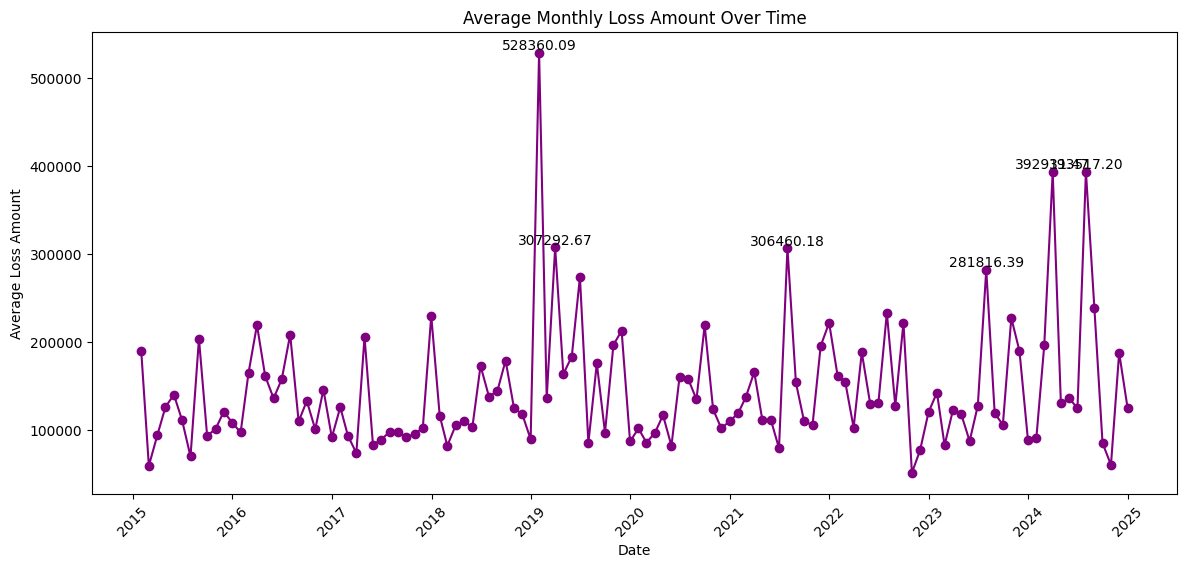

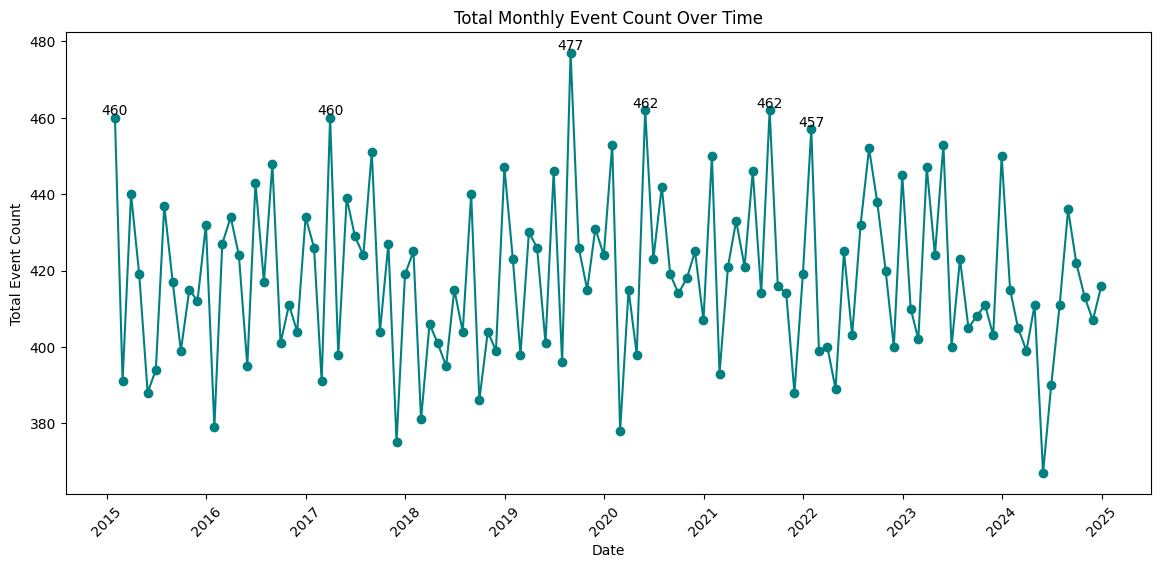

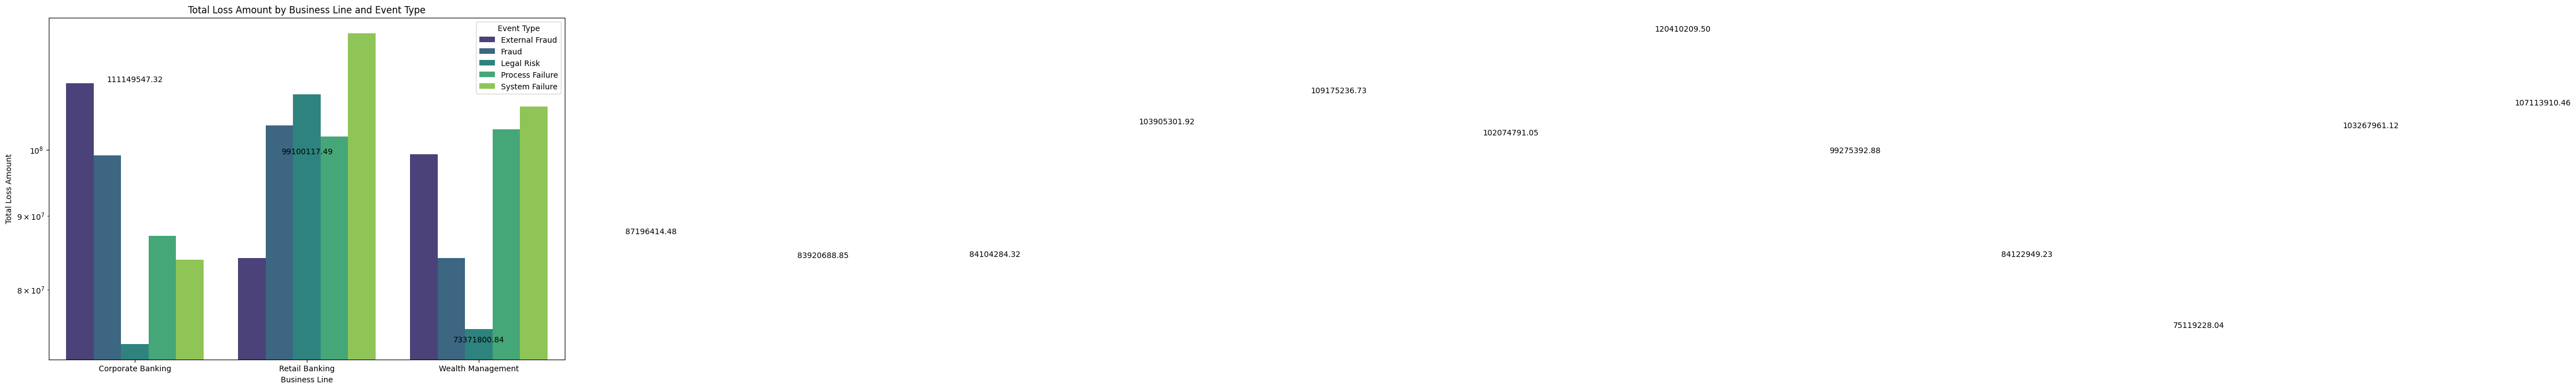

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for expanded dataset
n_samples = 10000  # Number of records
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 31)
business_lines = ["Retail Banking", "Corporate Banking", "Wealth Management"]
event_types = ["Fraud", "System Failure", "Legal Risk", "External Fraud", "Process Failure"]

# Generate random dates within the range
date_range = pd.date_range(start=start_date, end=end_date, periods=n_samples)

# Generate random business lines, event types, event counts, and loss amounts
business_line_data = np.random.choice(business_lines, size=n_samples)
event_type_data = np.random.choice(event_types, size=n_samples)
event_count_data = np.random.poisson(lam=5, size=n_samples)  # Poisson distribution for frequency
loss_amount_data = np.random.lognormal(mean=10, sigma=2, size=n_samples)  # Log-Normal for severity

# Generate event descriptions
event_description_data = [
    f"{event_type} occurred in {business_line} sector, impacting operations." 
    for event_type, business_line in zip(event_type_data, business_line_data)
]

# Create DataFrame
expanded_data = pd.DataFrame({
    'Date': date_range,
    'Business Line': business_line_data,
    'Event Type': event_type_data,
    'Event Count': event_count_data,
    'Loss Amount': loss_amount_data,
    'Event Description': event_description_data
})

# Summary of dataset
print(expanded_data.isnull().sum())  # Check for missing values
print(expanded_data.describe())      # Summary statistics

# Event Frequency by Business Line
plt.figure(figsize=(10, 6))
sns.countplot(data=expanded_data, x='Business Line', palette="Set2")
plt.title('Event Frequency by Business Line')
plt.xlabel('Business Line')
plt.ylabel('Event Count')
for index, value in enumerate(expanded_data['Business Line'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')  # Adding labels
plt.show()

# Event Frequency by Event Type
plt.figure(figsize=(10, 6))
sns.countplot(data=expanded_data, x='Event Type', palette="Set1")
plt.title('Event Frequency by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Event Count')
for index, value in enumerate(expanded_data['Event Type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')  # Adding labels
plt.show()

# Distribution of Loss Amount
plt.figure(figsize=(10, 6))
sns.histplot(expanded_data['Loss Amount'], bins=50, kde=True, color='orange')
plt.xscale('log')
plt.title('Distribution of Loss Amount (Log Scale)')
plt.xlabel('Loss Amount (Log Scale)')
plt.ylabel('Frequency')
plt.show()

# Resample Data to Monthly Frequency for time-based analysis
expanded_data['Date'] = pd.to_datetime(expanded_data['Date'])
monthly_data = expanded_data.resample('M', on='Date').agg({
    'Loss Amount': 'mean',
    'Event Count': 'sum'
})

# Average Monthly Loss Amount Over Time
plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['Loss Amount'], color='purple', marker='o')
plt.title('Average Monthly Loss Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Loss Amount')
plt.xticks(rotation=45)
# Adding labels to peaks
for x, y in zip(monthly_data.index, monthly_data['Loss Amount']):
    if y > monthly_data['Loss Amount'].quantile(0.95):  # Annotate top 5% peaks
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black')
plt.show()

# Total Monthly Event Count Over Time
plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['Event Count'], color='teal', marker='o')
plt.title('Total Monthly Event Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Event Count')
plt.xticks(rotation=45)
# Adding labels to peaks
for x, y in zip(monthly_data.index, monthly_data['Event Count']):
    if y > monthly_data['Event Count'].quantile(0.95):  # Annotate top 5% peaks
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='black')
plt.show()

# Group Data by Business Line and Event Type for Total Loss Analysis
grouped_data = expanded_data.groupby(['Business Line', 'Event Type']).agg({
    'Loss Amount': 'sum'
}).reset_index()

# Total Loss by Business Line and Event Type
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='Business Line', y='Loss Amount', hue='Event Type', palette='viridis')
plt.title('Total Loss Amount by Business Line and Event Type')
plt.xlabel('Business Line')
plt.ylabel('Total Loss Amount')
plt.yscale('log')  # Log scale for clarity
for index, row in grouped_data.iterrows():
    plt.text(index, row['Loss Amount'], f'{row["Loss Amount"]:.2f}', ha='center', va='bottom')
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_77616\3957551534.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


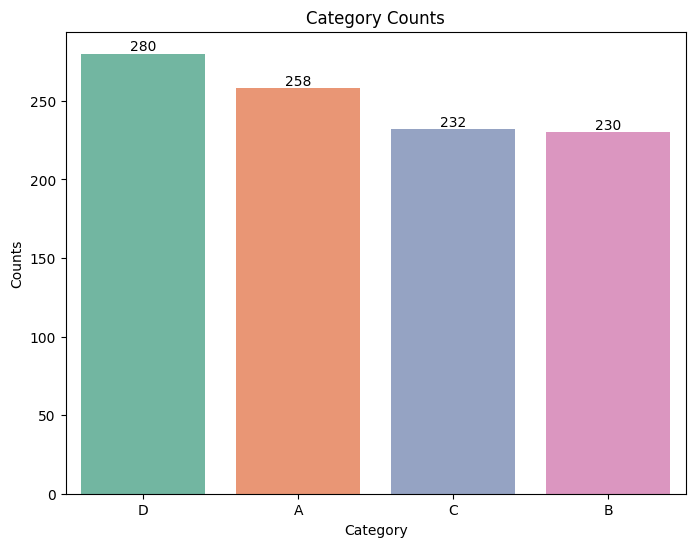

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (if needed to recreate)
np.random.seed(42)
n_samples = 1000
data = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C', 'D'], size=n_samples)
})

# Get counts
value_counts = data['Category'].value_counts()

# Create bar plot with counts
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Counts')

# Add count labels on top of each bar
for index, value in enumerate(value_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


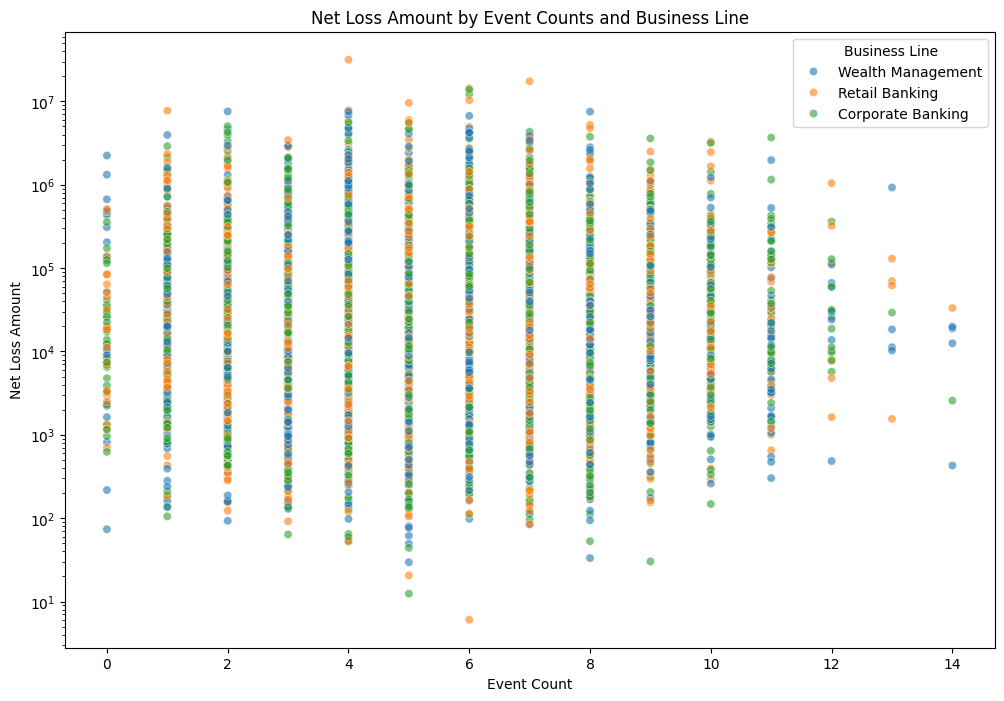

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for expanded dataset
n_samples = 10000  # Number of records
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 31)
business_lines = ["Retail Banking", "Corporate Banking", "Wealth Management"]
event_types = ["Fraud", "System Failure", "Legal Risk", "External Fraud", "Process Failure"]

# Generate random dates within the range
date_range = pd.date_range(start=start_date, end=end_date, periods=n_samples)

# Generate random business lines, event types, event counts, and loss amounts
business_line_data = np.random.choice(business_lines, size=n_samples)
event_type_data = np.random.choice(event_types, size=n_samples)
event_count_data = np.random.poisson(lam=5, size=n_samples)  # Poisson distribution for frequency
loss_amount_data = np.random.lognormal(mean=10, sigma=2, size=n_samples)  # Log-Normal for severity

# Create DataFrame
expanded_data = pd.DataFrame({
    'Date': date_range,
    'Business Line': business_line_data,
    'Event Type': event_type_data,
    'Event Count': event_count_data,
    'Net Loss Amount': loss_amount_data
})

# Plot Net Loss by Event Counts and Business Line
plt.figure(figsize=(12, 8))
sns.scatterplot(data=expanded_data, x='Event Count', y='Net Loss Amount', hue='Business Line', alpha=0.6)
plt.yscale('log')  # Log scale for better visualization if values are skewed
plt.title('Net Loss Amount by Event Counts and Business Line')
plt.xlabel('Event Count')
plt.ylabel('Net Loss Amount')

# Display plot
plt.legend(title='Business Line')
plt.show()


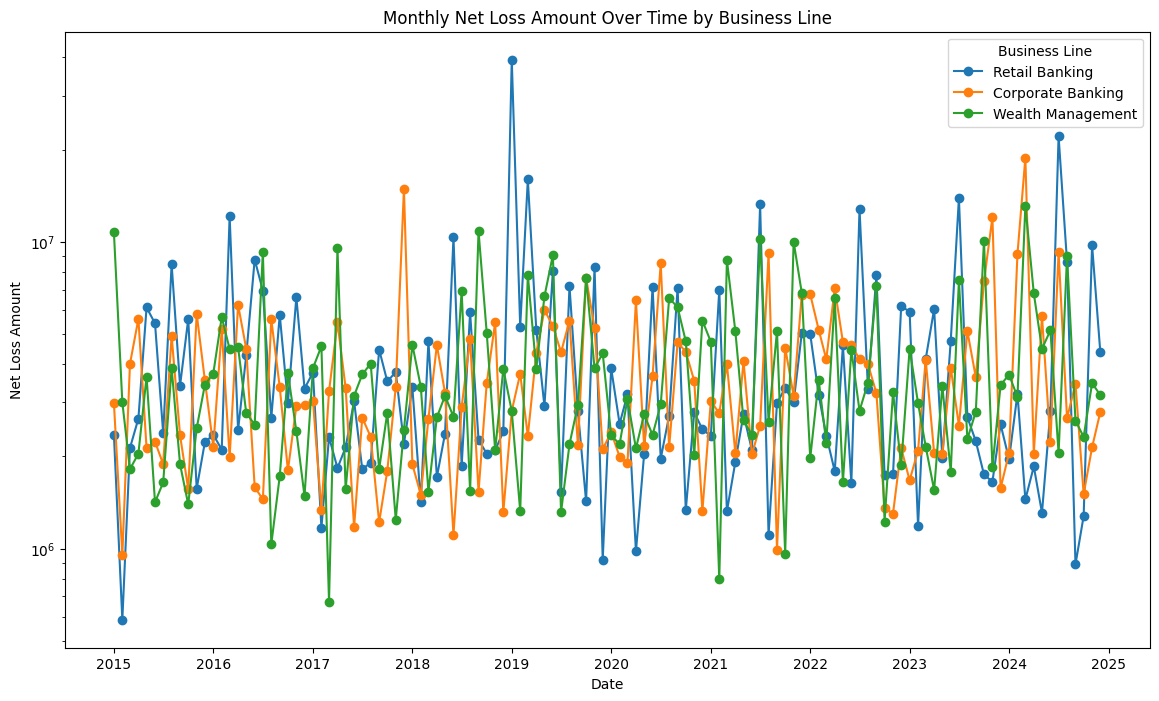

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for expanded dataset
n_samples = 10000  # Number of records
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 31)
business_lines = ["Retail Banking", "Corporate Banking", "Wealth Management"]
event_types = ["Fraud", "System Failure", "Legal Risk", "External Fraud", "Process Failure"]

# Generate random dates within the range
date_range = pd.date_range(start=start_date, end=end_date, periods=n_samples)

# Generate random business lines, event types, event counts, and loss amounts
business_line_data = np.random.choice(business_lines, size=n_samples)
event_type_data = np.random.choice(event_types, size=n_samples)
event_count_data = np.random.poisson(lam=5, size=n_samples)  # Poisson distribution for frequency
loss_amount_data = np.random.lognormal(mean=10, sigma=2, size=n_samples)  # Log-Normal for severity

# Create DataFrame
expanded_data = pd.DataFrame({
    'Date': date_range,
    'Business Line': business_line_data,
    'Event Type': event_type_data,
    'Event Count': event_count_data,
    'Net Loss Amount': loss_amount_data
})

# Aggregate data by month and business line for plotting
expanded_data['Month'] = expanded_data['Date'].dt.to_period('M')
monthly_losses = expanded_data.groupby(['Month', 'Business Line'])['Net Loss Amount'].sum().reset_index()
monthly_losses['Month'] = monthly_losses['Month'].dt.to_timestamp()  # Convert to timestamp for plotting

# Plot line chart of Net Loss Amount over time by Business Line
plt.figure(figsize=(14, 8))
for line in business_lines:
    subset = monthly_losses[monthly_losses['Business Line'] == line]
    plt.plot(subset['Month'], subset['Net Loss Amount'], marker='o', label=line)

# Add labels and title
plt.title('Monthly Net Loss Amount Over Time by Business Line')
plt.xlabel('Date')
plt.ylabel('Net Loss Amount')
plt.yscale('log')  # Log scale due to skewness in financial data
plt.legend(title='Business Line')

# Show plot
plt.show()


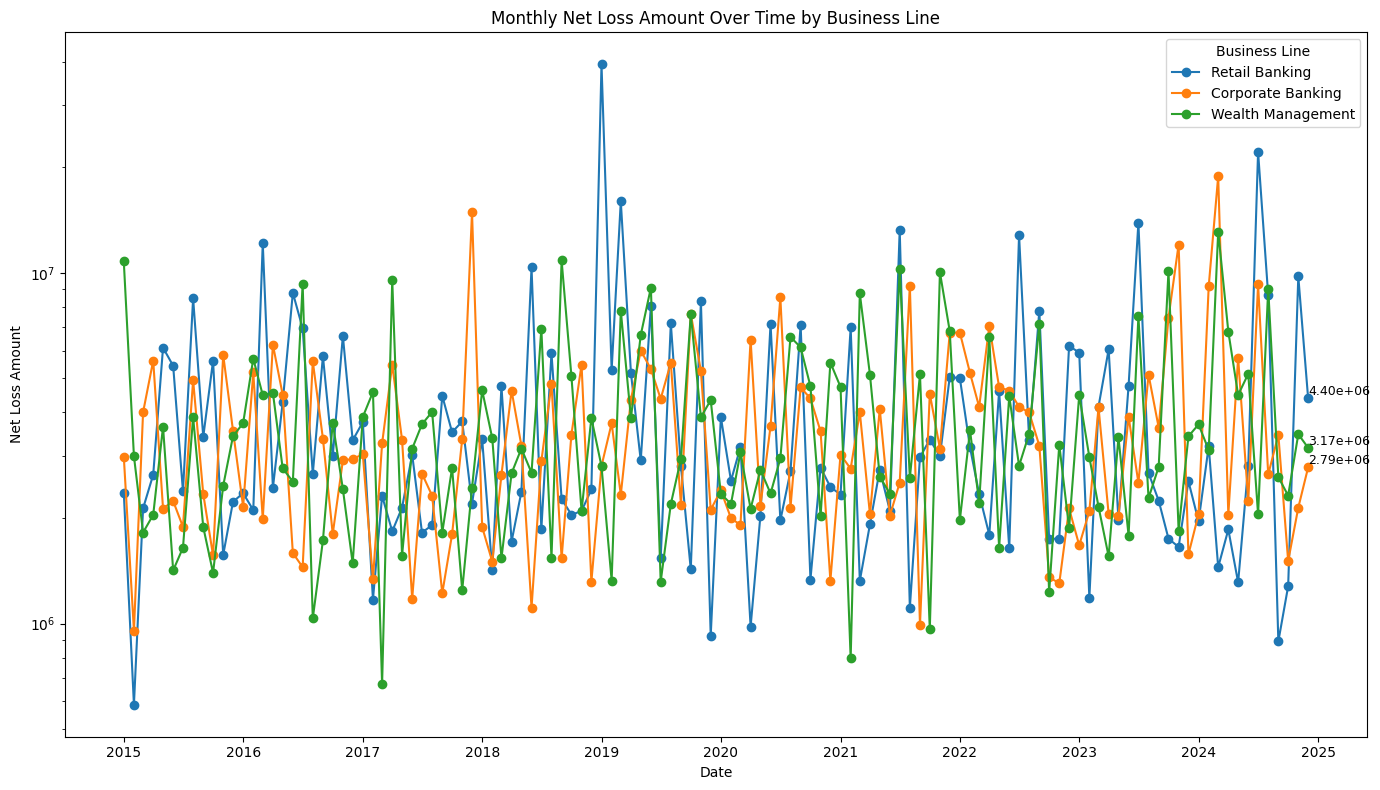

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for expanded dataset
n_samples = 10000  # Number of records
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 31)
business_lines = ["Retail Banking", "Corporate Banking", "Wealth Management"]
event_types = ["Fraud", "System Failure", "Legal Risk", "External Fraud", "Process Failure"]

# Generate random dates within the range
date_range = pd.date_range(start=start_date, end=end_date, periods=n_samples)

# Generate random business lines, event types, event counts, and loss amounts
business_line_data = np.random.choice(business_lines, size=n_samples)
event_type_data = np.random.choice(event_types, size=n_samples)
event_count_data = np.random.poisson(lam=5, size=n_samples)  # Poisson distribution for frequency
loss_amount_data = np.random.lognormal(mean=10, sigma=2, size=n_samples)  # Log-Normal for severity

# Create DataFrame
expanded_data = pd.DataFrame({
    'Date': date_range,
    'Business Line': business_line_data,
    'Event Type': event_type_data,
    'Event Count': event_count_data,
    'Net Loss Amount': loss_amount_data
})

# Aggregate data by month and business line for plotting
expanded_data['Month'] = expanded_data['Date'].dt.to_period('M')
monthly_losses = expanded_data.groupby(['Month', 'Business Line'])['Net Loss Amount'].sum().reset_index()
monthly_losses['Month'] = monthly_losses['Month'].dt.to_timestamp()  # Convert to timestamp for plotting

# Plot line chart of Net Loss Amount over time by Business Line
plt.figure(figsize=(14, 8))
for line in business_lines:
    subset = monthly_losses[monthly_losses['Business Line'] == line]
    plt.plot(subset['Month'], subset['Net Loss Amount'], marker='o', label=line)

    # Adding labels for the last data point of each line
    last_point = subset.iloc[-1]  # Get the last data point
    plt.text(last_point['Month'], last_point['Net Loss Amount'], f"{last_point['Net Loss Amount']:.2e}",
             color='black', fontsize=9, ha='left', va='bottom')

# Add labels and title
plt.title('Monthly Net Loss Amount Over Time by Business Line')
plt.xlabel('Date')
plt.ylabel('Net Loss Amount')
plt.yscale('log')  # Log scale due to skewness in financial data
plt.legend(title='Business Line')

# Show plot
plt.tight_layout()
plt.show()


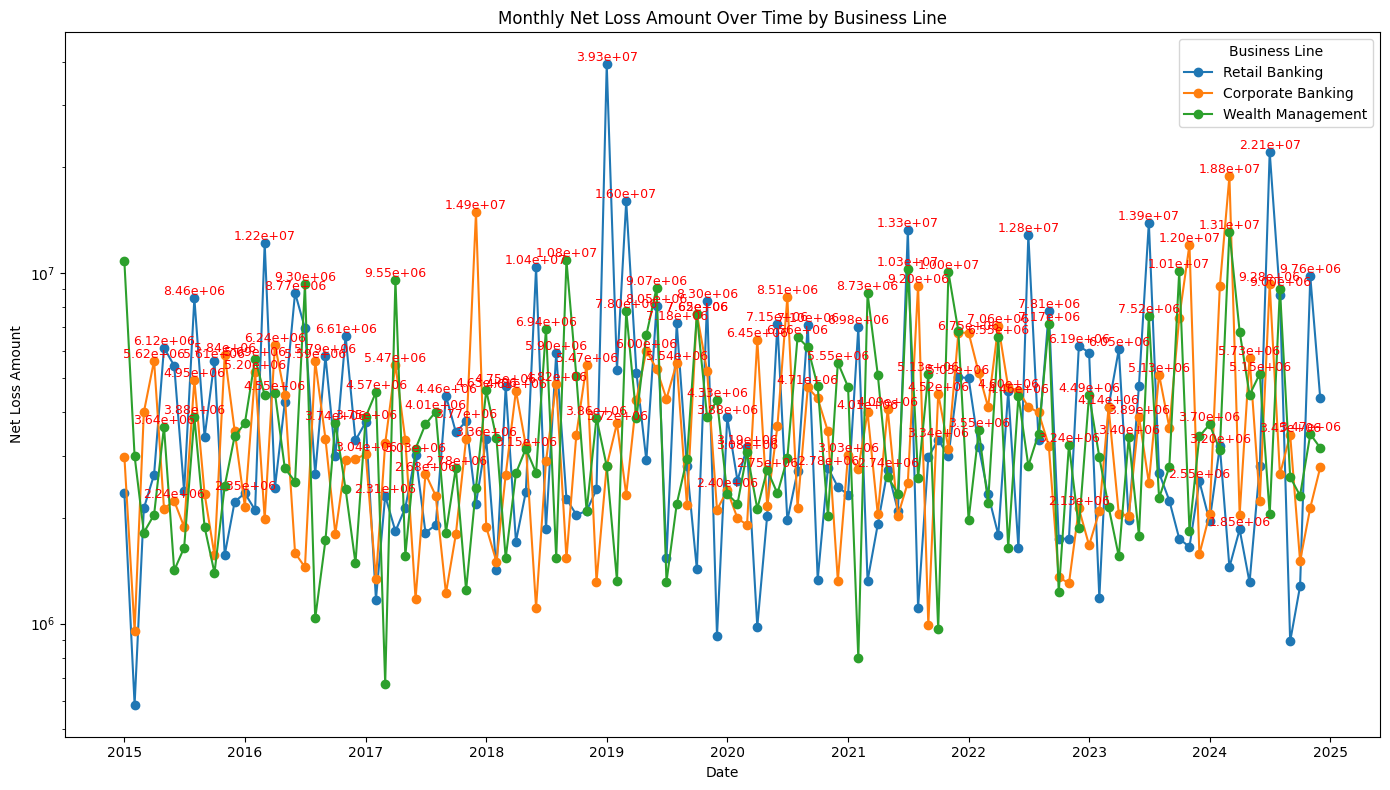

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for expanded dataset
n_samples = 10000  # Number of records
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 31)
business_lines = ["Retail Banking", "Corporate Banking", "Wealth Management"]
event_types = ["Fraud", "System Failure", "Legal Risk", "External Fraud", "Process Failure"]

# Generate random dates within the range
date_range = pd.date_range(start=start_date, end=end_date, periods=n_samples)

# Generate random business lines, event types, event counts, and loss amounts
business_line_data = np.random.choice(business_lines, size=n_samples)
event_type_data = np.random.choice(event_types, size=n_samples)
event_count_data = np.random.poisson(lam=5, size=n_samples)  # Poisson distribution for frequency
loss_amount_data = np.random.lognormal(mean=10, sigma=2, size=n_samples)  # Log-Normal for severity

# Create DataFrame
expanded_data = pd.DataFrame({
    'Date': date_range,
    'Business Line': business_line_data,
    'Event Type': event_type_data,
    'Event Count': event_count_data,
    'Net Loss Amount': loss_amount_data
})

# Aggregate data by month and business line for plotting
expanded_data['Month'] = expanded_data['Date'].dt.to_period('M')
monthly_losses = expanded_data.groupby(['Month', 'Business Line'])['Net Loss Amount'].sum().reset_index()
monthly_losses['Month'] = monthly_losses['Month'].dt.to_timestamp()  # Convert to timestamp for plotting

# Plot line chart of Net Loss Amount over time by Business Line
plt.figure(figsize=(14, 8))
for line in business_lines:
    subset = monthly_losses[monthly_losses['Business Line'] == line]
    plt.plot(subset['Month'], subset['Net Loss Amount'], marker='o', label=line)

    # Find and label the high spikes
    for i in range(1, len(subset) - 1):  # Skip first and last points
        if subset['Net Loss Amount'].iloc[i] > subset['Net Loss Amount'].iloc[i-1] and subset['Net Loss Amount'].iloc[i] > subset['Net Loss Amount'].iloc[i+1]:
            plt.text(subset['Month'].iloc[i], subset['Net Loss Amount'].iloc[i],
                     f"{subset['Net Loss Amount'].iloc[i]:.2e}", color='red', fontsize=9, ha='center', va='bottom')

# Add labels and title
plt.title('Monthly Net Loss Amount Over Time by Business Line')
plt.xlabel('Date')
plt.ylabel('Net Loss Amount')
plt.yscale('log')  # Log scale due to skewness in financial data
plt.legend(title='Business Line')

# Show plot
plt.tight_layout()
plt.show()


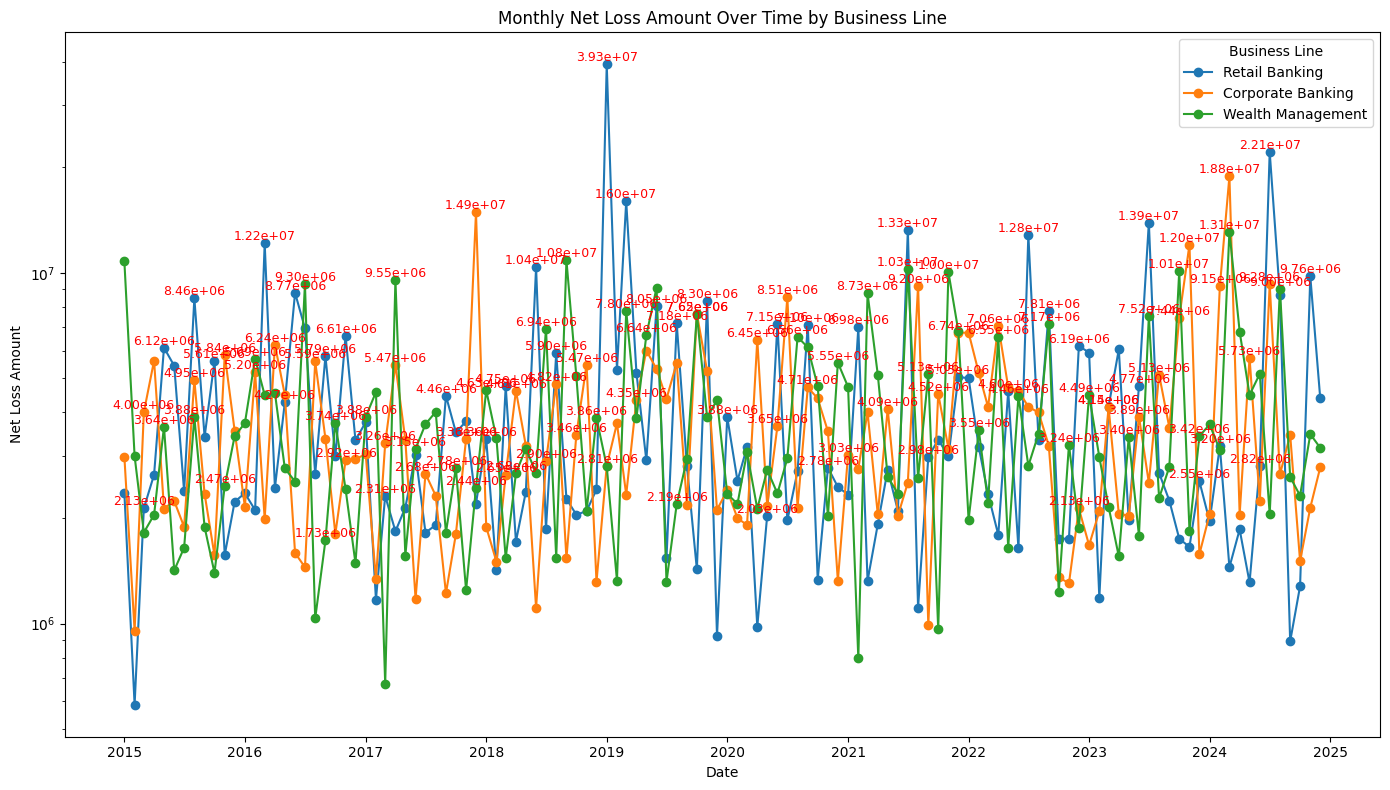

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for expanded dataset
n_samples = 10000  # Number of records
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 31)
business_lines = ["Retail Banking", "Corporate Banking", "Wealth Management"]
event_types = ["Fraud", "System Failure", "Legal Risk", "External Fraud", "Process Failure"]

# Generate random dates within the range
date_range = pd.date_range(start=start_date, end=end_date, periods=n_samples)

# Generate random business lines, event types, event counts, and loss amounts
business_line_data = np.random.choice(business_lines, size=n_samples)
event_type_data = np.random.choice(event_types, size=n_samples)
event_count_data = np.random.poisson(lam=5, size=n_samples)  # Poisson distribution for frequency
loss_amount_data = np.random.lognormal(mean=10, sigma=2, size=n_samples)  # Log-Normal for severity

# Create DataFrame
expanded_data = pd.DataFrame({
    'Date': date_range,
    'Business Line': business_line_data,
    'Event Type': event_type_data,
    'Event Count': event_count_data,
    'Net Loss Amount': loss_amount_data
})

# Aggregate data by month and business line for plotting
expanded_data['Month'] = expanded_data['Date'].dt.to_period('M')
monthly_losses = expanded_data.groupby(['Month', 'Business Line'])['Net Loss Amount'].sum().reset_index()
monthly_losses['Month'] = monthly_losses['Month'].dt.to_timestamp()  # Convert to timestamp for plotting

# Plot line chart of Net Loss Amount over time by Business Line
plt.figure(figsize=(14, 8))
for line in business_lines:
    subset = monthly_losses[monthly_losses['Business Line'] == line]
    plt.plot(subset['Month'], subset['Net Loss Amount'], marker='o', label=line)

    # Find and label the high spikes (threshold of 50% higher than previous point)
    for i in range(1, len(subset)):
        if subset['Net Loss Amount'].iloc[i] > 1.5 * subset['Net Loss Amount'].iloc[i-1]:  # 50% higher than the previous point
            plt.text(subset['Month'].iloc[i], subset['Net Loss Amount'].iloc[i],
                     f"{subset['Net Loss Amount'].iloc[i]:.2e}", color='red', fontsize=9, ha='center', va='bottom')

# Add labels and title
plt.title('Monthly Net Loss Amount Over Time by Business Line')
plt.xlabel('Date')
plt.ylabel('Net Loss Amount')
plt.yscale('log')  # Log scale due to skewness in financial data
plt.legend(title='Business Line')

# Show plot
plt.tight_layout()
plt.show()


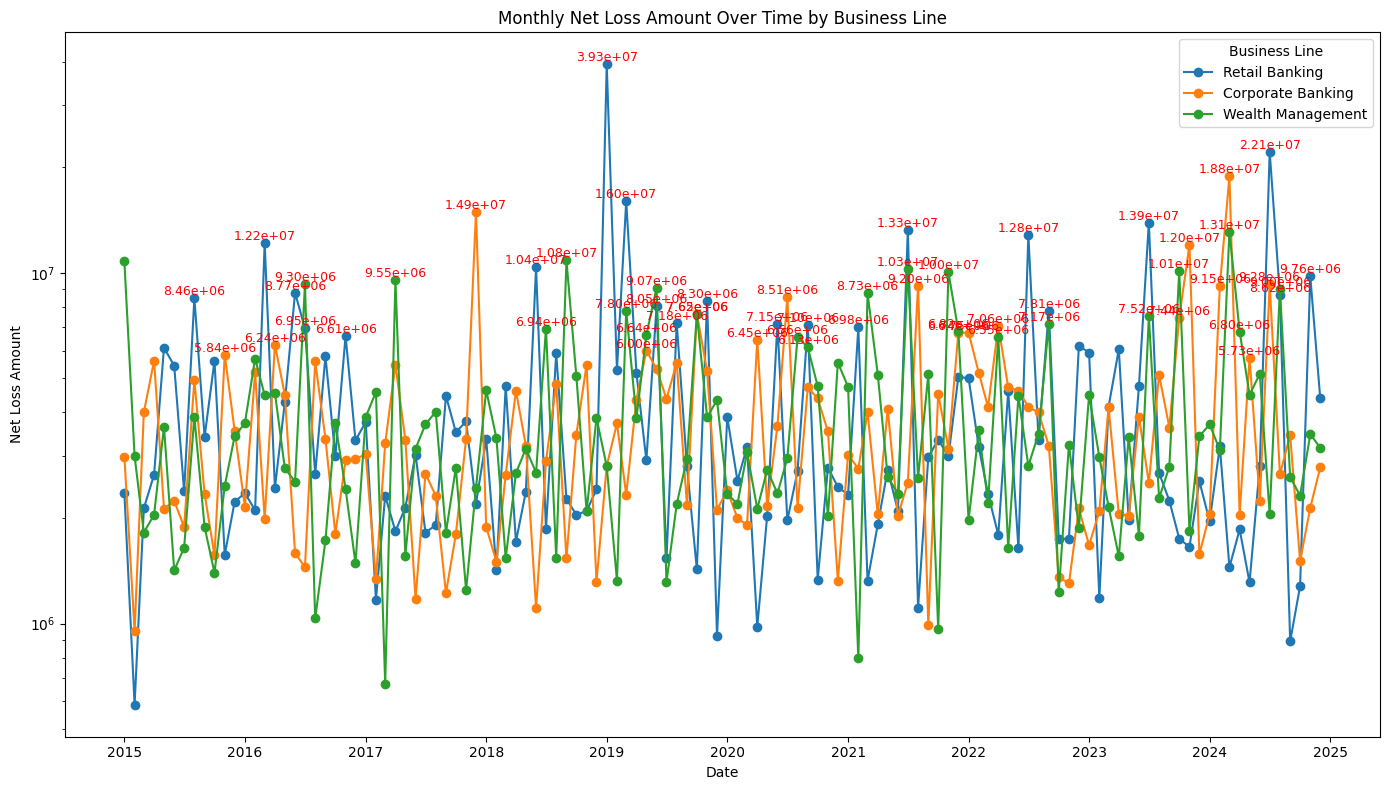

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for expanded dataset
n_samples = 10000  # Number of records
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 31)
business_lines = ["Retail Banking", "Corporate Banking", "Wealth Management"]
event_types = ["Fraud", "System Failure", "Legal Risk", "External Fraud", "Process Failure"]

# Generate random dates within the range
date_range = pd.date_range(start=start_date, end=end_date, periods=n_samples)

# Generate random business lines, event types, event counts, and loss amounts
business_line_data = np.random.choice(business_lines, size=n_samples)
event_type_data = np.random.choice(event_types, size=n_samples)
event_count_data = np.random.poisson(lam=5, size=n_samples)  # Poisson distribution for frequency
loss_amount_data = np.random.lognormal(mean=10, sigma=2, size=n_samples)  # Log-Normal for severity

# Create DataFrame
expanded_data = pd.DataFrame({
    'Date': date_range,
    'Business Line': business_line_data,
    'Event Type': event_type_data,
    'Event Count': event_count_data,
    'Net Loss Amount': loss_amount_data
})

# Aggregate data by month and business line for plotting
expanded_data['Month'] = expanded_data['Date'].dt.to_period('M')
monthly_losses = expanded_data.groupby(['Month', 'Business Line'])['Net Loss Amount'].sum().reset_index()
monthly_losses['Month'] = monthly_losses['Month'].dt.to_timestamp()  # Convert to timestamp for plotting

# Plot line chart of Net Loss Amount over time by Business Line
plt.figure(figsize=(14, 8))
for line in business_lines:
    subset = monthly_losses[monthly_losses['Business Line'] == line]
    plt.plot(subset['Month'], subset['Net Loss Amount'], marker='o', label=line)

    # Calculate mean of 'Net Loss Amount' for the current business line
    mean_loss = subset['Net Loss Amount'].mean()

    # Find and label the high spikes (threshold more than 150% of the mean)
    for i in range(1, len(subset)):
        if subset['Net Loss Amount'].iloc[i] > 1.5 * mean_loss:  # 150% of the mean value
            plt.text(subset['Month'].iloc[i], subset['Net Loss Amount'].iloc[i],
                     f"{subset['Net Loss Amount'].iloc[i]:.2e}", color='red', fontsize=9, ha='center', va='bottom')

# Add labels and title
plt.title('Monthly Net Loss Amount Over Time by Business Line')
plt.xlabel('Date')
plt.ylabel('Net Loss Amount')
plt.yscale('log')  # Log scale due to skewness in financial data
plt.legend(title='Business Line')

# Show plot
plt.tight_layout()
plt.show()
